<a href="https://colab.research.google.com/github/Malikarbaaz/CREDIT_CARD_DEFAULT_PREDICTION/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# <b><u> Objective :-  </u></b> <b>
* Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by Credit Card Default.

* We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

* Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Dataset
file_path = '/content/drive/MyDrive/Credit Card Default Prediction/Data & Resources/default of credit card clients.xls'

In [4]:
# Reading our Dataset
data = pd.read_excel(file_path, header=1)

In [5]:
# head gives the top 5 rows of the given dataset
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# tail gives the bottom 5 rows of the given dataset
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
#info() print the basic information of our DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# <b><u> Features description :-  </u></b> <b>
1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-2 = Unused,-1=pay duly,0=Revolving Credit, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9.PAY_3: Repayment status in July, 2005 (scale same as above)
10.PAY_4: Repayment status in June, 2005 (scale same as above)
11.PAY_5: Repayment status in May, 2005 (scale same as above)
12.PAY_6: Repayment status in April, 2005 (scale same as above)
13.BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14.BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15.BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16.BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17.BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18.BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19.PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20.PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21.PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22.PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23.PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24.PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25.default.payment.next.month: Default payment (1=yes, 0=no)


In [8]:
# describe() gives the overall descriptive summary of the dataframe
data.describe(include='all').T       # transpose() convert the column to row and row to column.

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
#  Shape give the total number of rows and columns
print('Rows {} , Columns {}'.format(data.shape[0], data.shape[1]))

Rows 30000 , Columns 25


## **Preprocessing the dataset**
####  **In real world the data has a lot of missing values and it is due to data corruption or fail to record the data. For that purpose it is very important to handle the missing values also many of machine learning algorithms does not support missing values, that's why we check missing values first.**

In [10]:
# Checking the total null values in our dataset.
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
# Identifying the unique number of values in the dataset
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [12]:
# Checking the totol number of duplicate values 
print('Duplicate values in our dataset is:',len(data[data.duplicated()]))

Duplicate values in our dataset is: 0


### **Luckly we see there are no null values nor duplicate values in our given dataset.**

### **Here we creating a copy of dataframe because whatever we applying a conditions on the given data so that it doesn't affect our original dataset.**

In [13]:
# Creating a copy of dataframe
df = data.copy()

In [14]:
print('Column names are :\n',list(df.columns))

Column names are :
 ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


### **As we see the column name isn't understanding, so lets rename it for better convinience**

In [15]:
# renaming the column feature for better understanding
df.rename(columns = {'default payment next month':'Next_month_defaulter','PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN',
                     
                   'PAY_5':'PAY_MAY','PAY_6':'PAY_APR','BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL',

                   'BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG',
                   
                   'PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'} ,inplace=True )

In [16]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Next_month_defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Exploratory Data Analysis (EDA)**

In [17]:
# value_counts will count the values of column of the given dataset
df['Next_month_defaulter'].value_counts()      # this is our dependent variable

0    23364
1     6636
Name: Next_month_defaulter, dtype: int64

### **Dependent Variable**

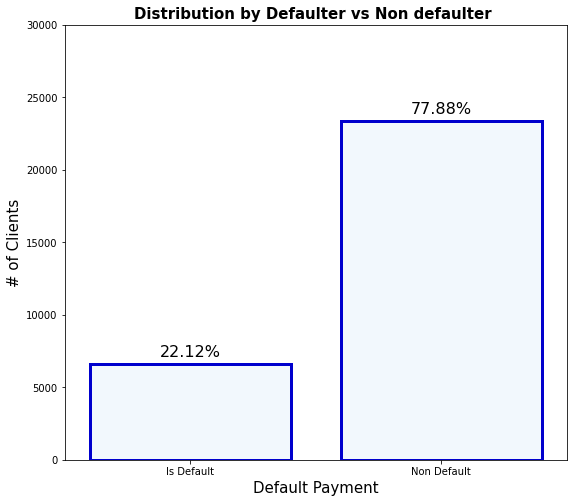

In [18]:
# Replacing the values of 0 and 1 to string values for better understanding.
df['Defaulter'] = df.Next_month_defaulter.replace([1,0], ['Is Default', 'Non Default'])

#plotting the count plot to vizualize the data distribution 
plt.figure(figsize=(9,8))
ax = sns.countplot(x="Defaulter", data=df,color = 'aliceblue', edgecolor = 'mediumblue',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,30000)        # making the y-axis limit to 30,000
plt.title('Distribution by Defaulter vs Non defaulter ',weight ='bold', fontsize= 15)
for p in ax.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

### **conclusion:**  
* ### **For Next_month_defaulter column:- we replace 0 with 'Non Default' and 1 with 'Is Default' and store in a new variable 'Defaulter'.**
* ### **From above plot we clearly say that Defaulters are less than the Non Defaulters.**
 * *Approx 78% are Non Defaulters and 22% are Defaulters respectively.* 

### <b><u> Independent variable 

### <b> Categorical Features
#### We have few categorical features in our dataset that are: 
* SEX
* EDUCATION
* MARRIAGE
* Age <b>

Let's check how they are related with out target/dependent variable.

### <b> SEX


In [19]:
print('SEX column distribution : 1=Male, 2=Female')
df['SEX'].value_counts()

SEX column distribution : 1=Male, 2=Female


2    18112
1    11888
Name: SEX, dtype: int64

### **Education**


In [20]:
print('EDUCATION column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown')
df['EDUCATION'].value_counts()

EDUCATION column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

### **Since 5 and 6 is unknown and 0 isn't explained in the dataset description, so we move this category to 4 which is others.**

In [21]:
colm = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[colm, 'EDUCATION'] = 1
df['EDUCATION'].value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64

### **MARRIAGE**

In [22]:
print('MARRIAGE column distribution : 1=Married, 2=Single, 3=Others')
df['MARRIAGE'].value_counts()

MARRIAGE column distribution : 1=Married, 2=Single, 3=Others


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

### **Here also same in marriage 0 isn't explained so we put this 0 category to 3.**

In [23]:
colm = df['MARRIAGE'] == 0
df.loc[colm, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### **Here we create a new variable and store the categorical features to that variable and add dependent variable for analysis of these features.**

In [24]:
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [25]:
df_category = df[cat_features]
df_category = pd.concat([df_category, df['Defaulter']], axis=1)

In [26]:
# lets replace the values of categorical column by names as given in the data above
df_category.replace({'SEX':{1:'Male', 2:'Female'} , 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
               'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [27]:
df_category.head(10)

,SEX,EDUCATION,MARRIAGE,Defaulter
0,Female,university,married,Is Default
1,Female,university,single,Is Default
2,Female,university,single,Non Default
3,Female,university,married,Non Default
4,Male,university,married,Non Default
5,Male,graduate school,single,Non Default
6,Male,graduate school,single,Non Default
7,Female,university,single,Non Default
8,Female,high school,married,Non Default
9,Male,high school,single,Non Default


### **Based on this categorical features we can say that whether a customer is  default or not.**

Female    18112
Male      11888
Name: SEX, dtype: int64 

Defaulter  Is Default  Non Default
SEX                               
Female           3763        14349
Male             2873         9015


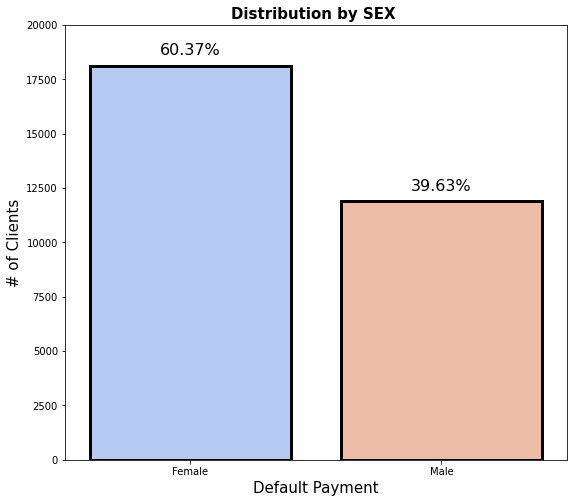

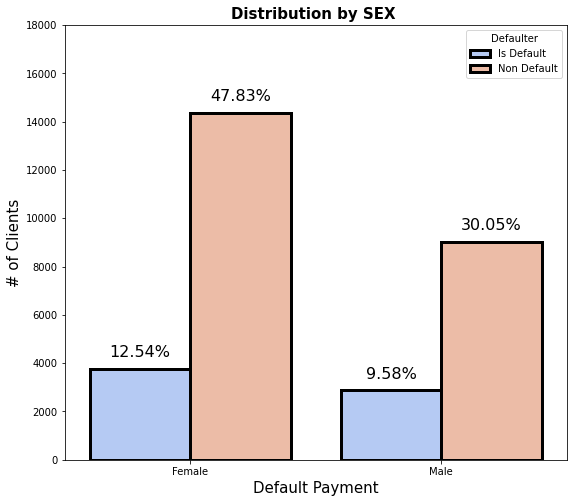

In [28]:
 print(df_category['SEX'].value_counts(),'\n')
print(df_category.groupby(['SEX', 'Defaulter']).size().unstack()) 

#plotting graph for SEX feature
plt.figure(figsize=(9,8))
ax = sns.countplot(x="SEX", data=df_category,  palette = 'coolwarm', edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,20000)
plt.title('Distribution by SEX ',weight ='bold', fontsize= 15)
for p in ax.patches:                              
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# plotting graph for SEX [Is Defaulter or not]
plt.figure(figsize=(9,8))
ax = sns.countplot(x="SEX", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution by SEX ',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

###<b> From the above data analysis we can say that 

### **1 - male**
### **2 - female**
* ### **Number of Male credit holders is less than Female.**
* ### **Approx 40% are male aur 60% are Female and in that 10% are default from male & 13% ar default from female.** 

university         14030
graduate school    10930
high school         4917
others               123
Name: EDUCATION, dtype: int64 

Defaulter        Is Default  Non Default
EDUCATION                               
graduate school        2062         8868
high school            1237         3680
others                    7          116
university             3330        10700


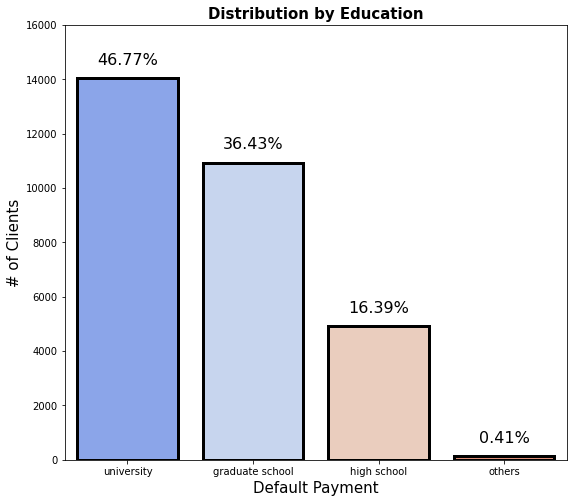

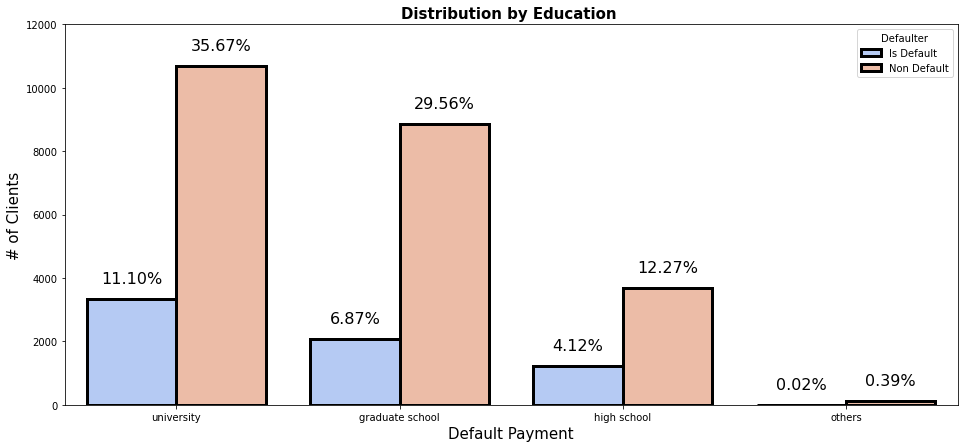

In [29]:
print(df_category['EDUCATION'].value_counts(),'\n')
print(df_category.groupby(['EDUCATION', 'Defaulter']).size().unstack()) 

#plotting graph for Education
plt.figure(figsize=(9,8))
ax = sns.countplot(x="EDUCATION", data=df_category,  palette = 'coolwarm', edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,16000)
plt.title('Distribution by Education',weight ='bold', fontsize= 15)
for p in ax.patches:                              
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# plotting graph for Education [university, graduate school, highschool, others]
plt.figure(figsize=(16,7))
ax = sns.countplot(x="EDUCATION", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,12000)
plt.title('Distribution by Education ',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

###<b> From the above data analysis we can say that 

### **1 -  graduate school**
### **2 - university**
### **3 - high school**
### **4 - others**
* ### **More number of credit holders are university students followed by Graduates and then High school students.**
* ### **From university 11% are default, from graduate 7% are default, and from high school 4% are default.** 

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64 

Defaulter  Is Default  Non Default
MARRIAGE                          
married          3206        10453
others             89          288
single           3341        12623


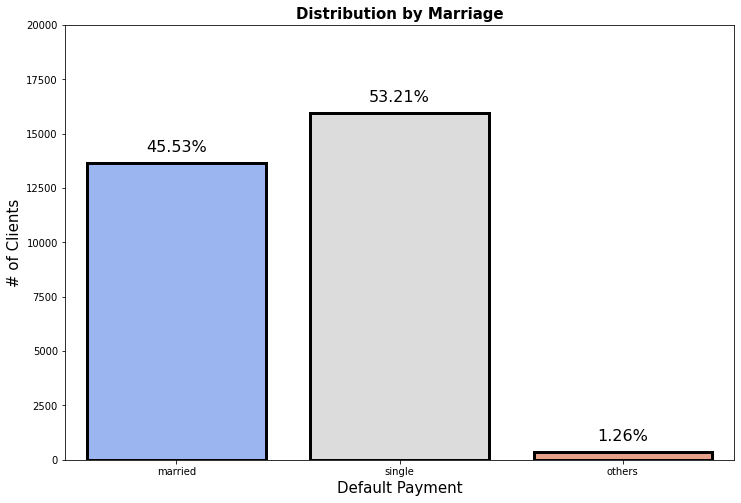

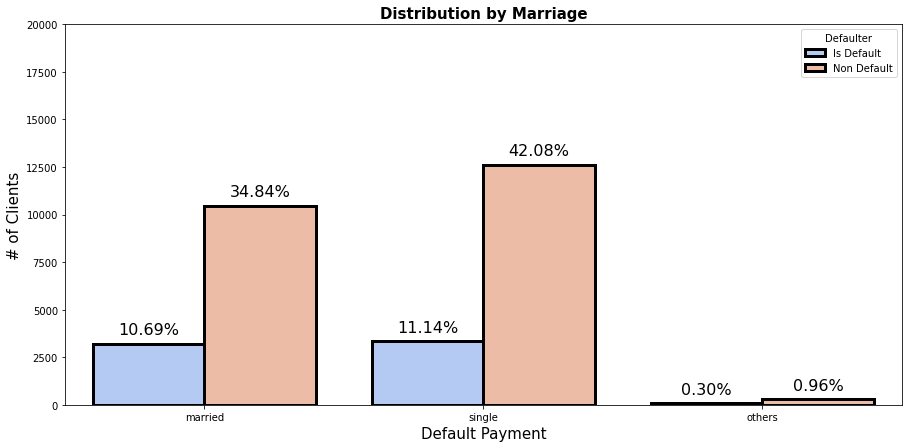

In [30]:
print(df_category['MARRIAGE'].value_counts(),'\n')
print(df_category.groupby(['MARRIAGE', 'Defaulter']).size().unstack())          

#plotting graph for Marriage
plt.figure(figsize=(12,8))
ax = sns.countplot(x="MARRIAGE", data=df_category,  palette = 'coolwarm', edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,20000)
plt.title('Distribution by Marriage',weight ='bold', fontsize= 15)
for p in ax.patches:                              
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# plotting graph for Marriage [married, single, others]
plt.figure(figsize=(15,7))
ax = sns.countplot(x="MARRIAGE", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,20000)
plt.title('Distribution by Marriage',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

###<b> From the above data analysis we can say that 

### **1 - married**
### **2 - single**
### **3 - others**
* ### **More number of credit cards holder are single as compared to married.**
* ### **From single 11% are default and from married approx 11% are defaulter.**

### **AGE**

In [31]:
# Here we groupby Age and Defaulter column to get number of defaults and non defaults. 
df_age =  df.groupby(['AGE', 'Defaulter']).size().unstack()
df_age

Defaulter,Is Default,Non Default
AGE,,
21,14.0,53.0
22,169.0,391.0
23,247.0,684.0
24,300.0,827.0
25,302.0,884.0
26,253.0,1003.0
27,313.0,1164.0
28,286.0,1123.0
29,313.0,1292.0


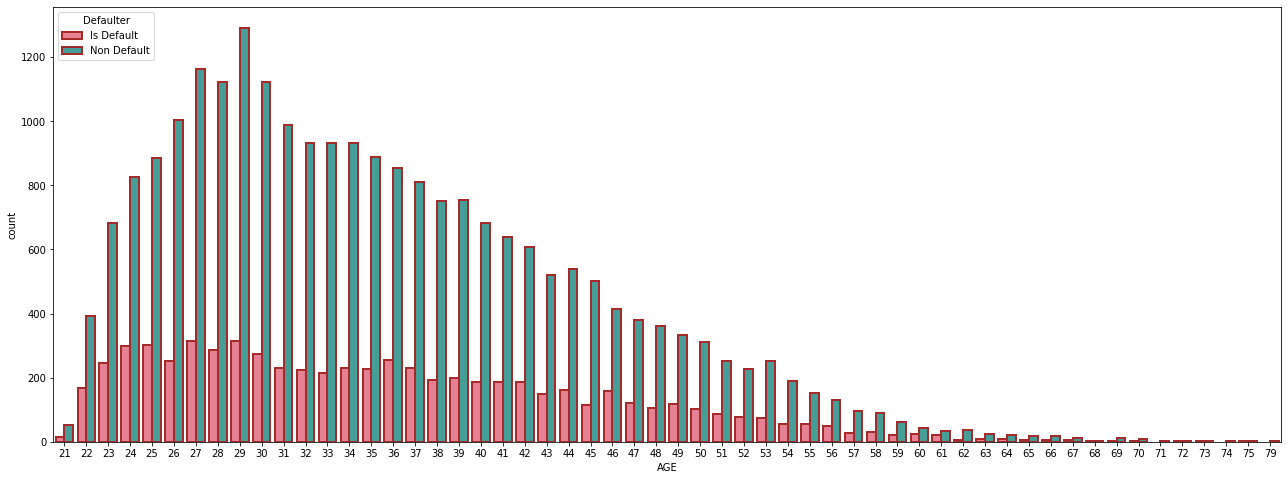

In [32]:
#plotting the count plot to vizualize the data distribution with respect to Age
plt.figure(figsize=[22, 8])
sns.countplot(x = 'AGE', hue = 'Defaulter', data =df, palette = 'husl', edgecolor = 'brown',lw=2)

### **From the above graph we can say that,**
* ### **More number of credit card holders age between 26-32 years and 29 years age is the highest uses of credit card.**
* ### **Age above 60 years old rarely uses the credit card.**
* ### **Also more number of Defaulters are between 27-29 years.**

### **LIMIT BALANCE**

In [33]:
# Here we groupby LIMIT_BAL and Defaulter column to get number of defaults and non defaults. 
df_limit = df.groupby(['LIMIT_BAL', 'Defaulter']).size().unstack()
df_limit.head(15)

Defaulter,Is Default,Non Default
LIMIT_BAL,,
10000,197.0,296.0
16000,NaN,2.0
20000,698.0,1278.0
30000,568.0,1042.0
40000,92.0,138.0
50000,885.0,2480.0
60000,233.0,592.0
70000,210.0,521.0
80000,363.0,1204.0


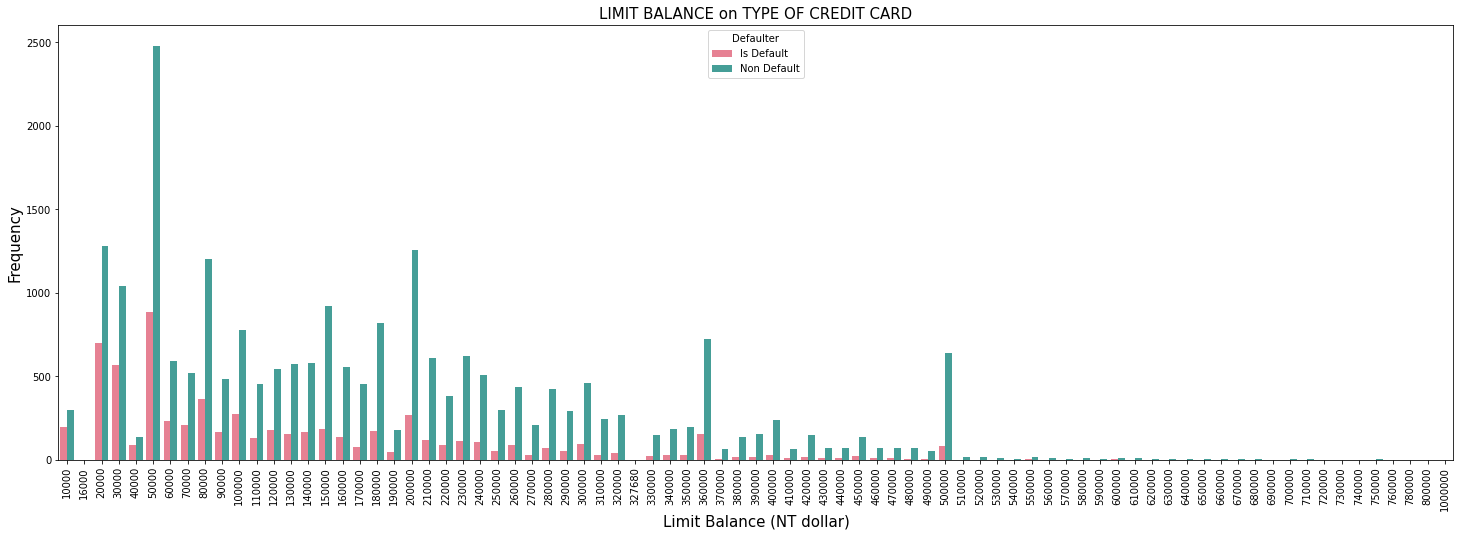

In [34]:
#plotting the count plot to vizualize the data distribution with respect to Limit Balance
plt.figure(figsize=[25, 8])
sns.countplot(x = 'LIMIT_BAL', hue = 'Defaulter',data =df, palette = 'husl')
plt.xticks(rotation = 90)
plt.xlabel('Limit Balance (NT dollar)', SIZE=15)
plt.ylabel('Frequency', SIZE=15)
plt.title('LIMIT BALANCE on TYPE OF CREDIT CARD', SIZE=15)
plt.show()

* ### **Maximum amount of given credit in NT dollars is 50,000 followed by 20,000 and 30,000.**
* ### **And Defaulters are between this Limit Balance only.**

### **Previous payment status**

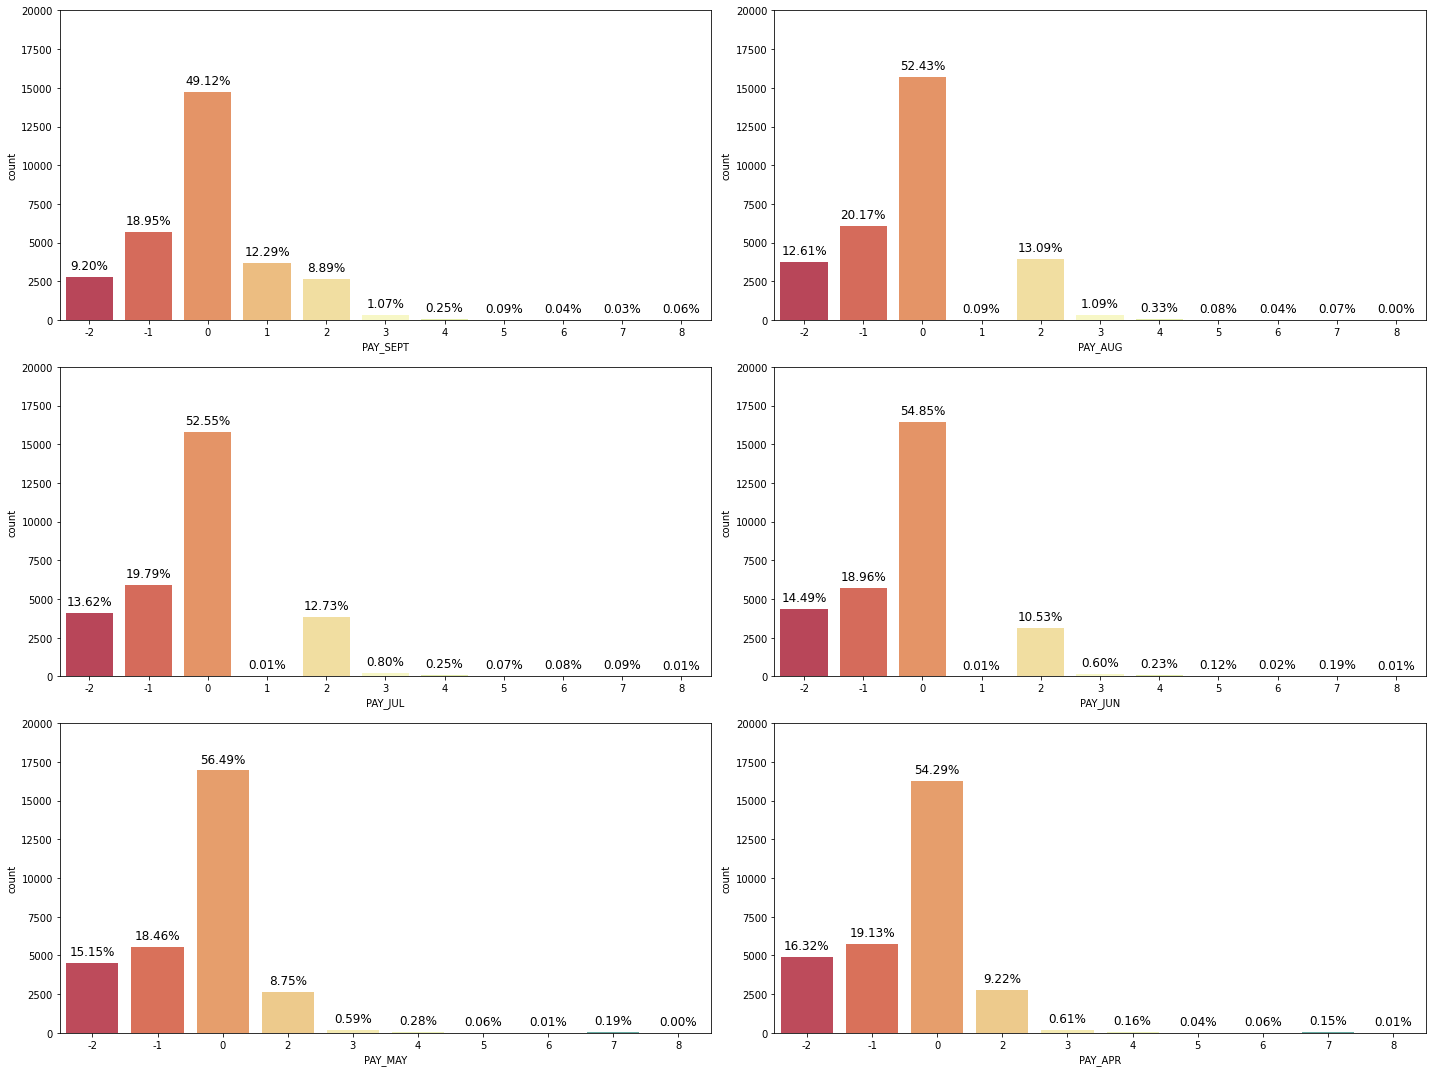

In [35]:
# looking at the payment columns for each month.
pay = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

# Plotting graph for payment columns 
plt.figure(figsize=(20,15))
for i,col in enumerate(pay):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'Spectral')
    plt.ylim(0,20000)
    plt.ylabel('count')
    plt.tight_layout()

    for p in ax.patches:                               
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 12)

### **After looking at the previous month status maximum number of defaulters are delaying payment after 2 months.**

### **Amount of bill statement of each month**

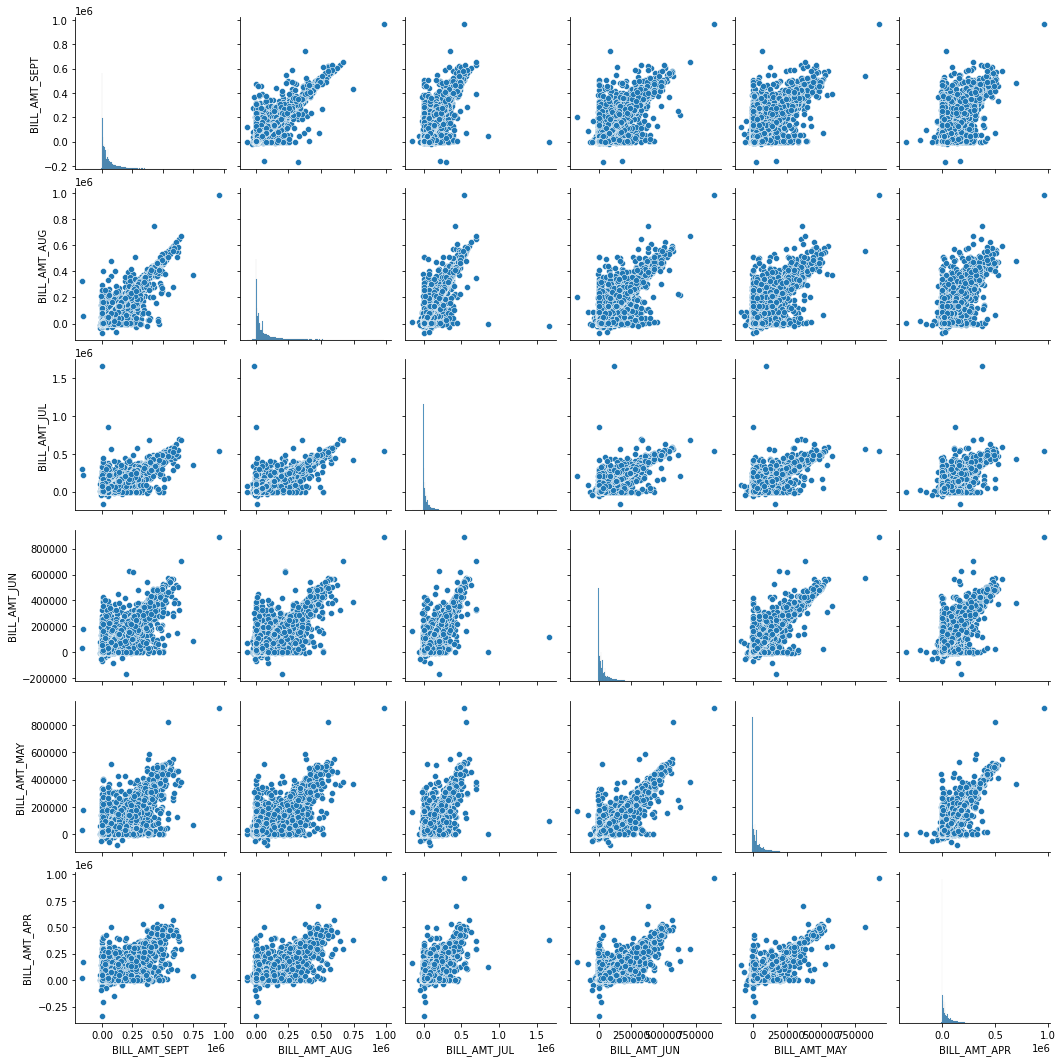

In [36]:
#assign the bill amount features to a single variable 
df_bill_amount = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
sns.pairplot(data = df_bill_amount) #plotting the pair plot for bill amount

### **Outliers Detection using boxplot**
* **We use boxplot to understand how many outliers are there in our data and we see that there are lots of outliers.**

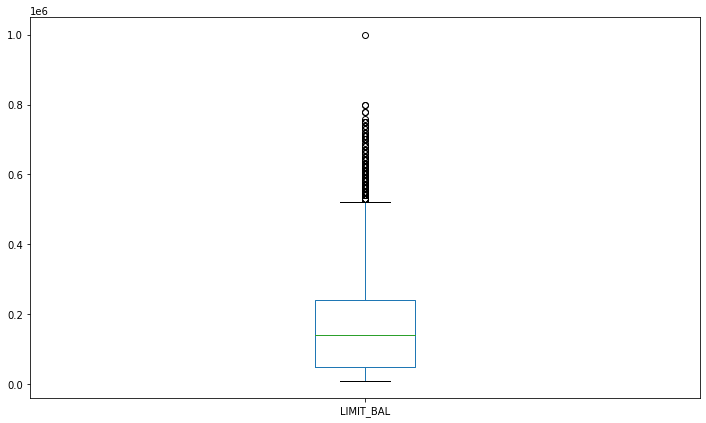

In [37]:
#Using boxplot to identify the outlier in the dataset
plt.figure(figsize=(12,7))
df["LIMIT_BAL"].plot(kind="box")
plt.show()

### **Removing the outliers**
* **In order to drop the outliers here we using IQR to finding out how many outliers are there to drop them.**

In [38]:
def remove_outlier_using_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final_output = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final_output

In [39]:
df["LIMIT_BAL"] = remove_outlier_using_IQR(df["LIMIT_BAL"])

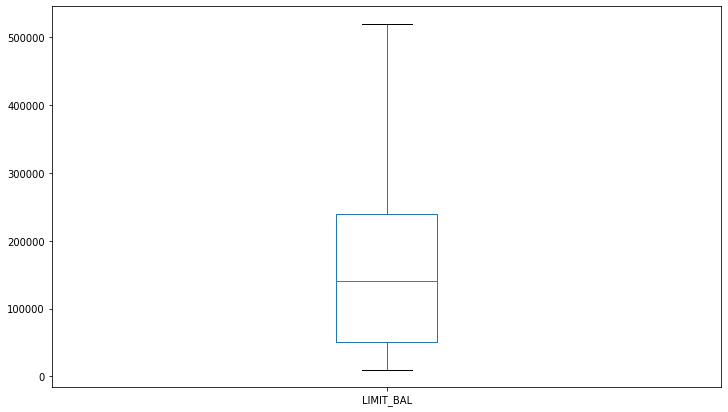

In [40]:
#After removing outlier
plt.figure(figsize=(12,7))
df["LIMIT_BAL"].plot(kind="box")
plt.show()

### **Checking correlation between each variables**

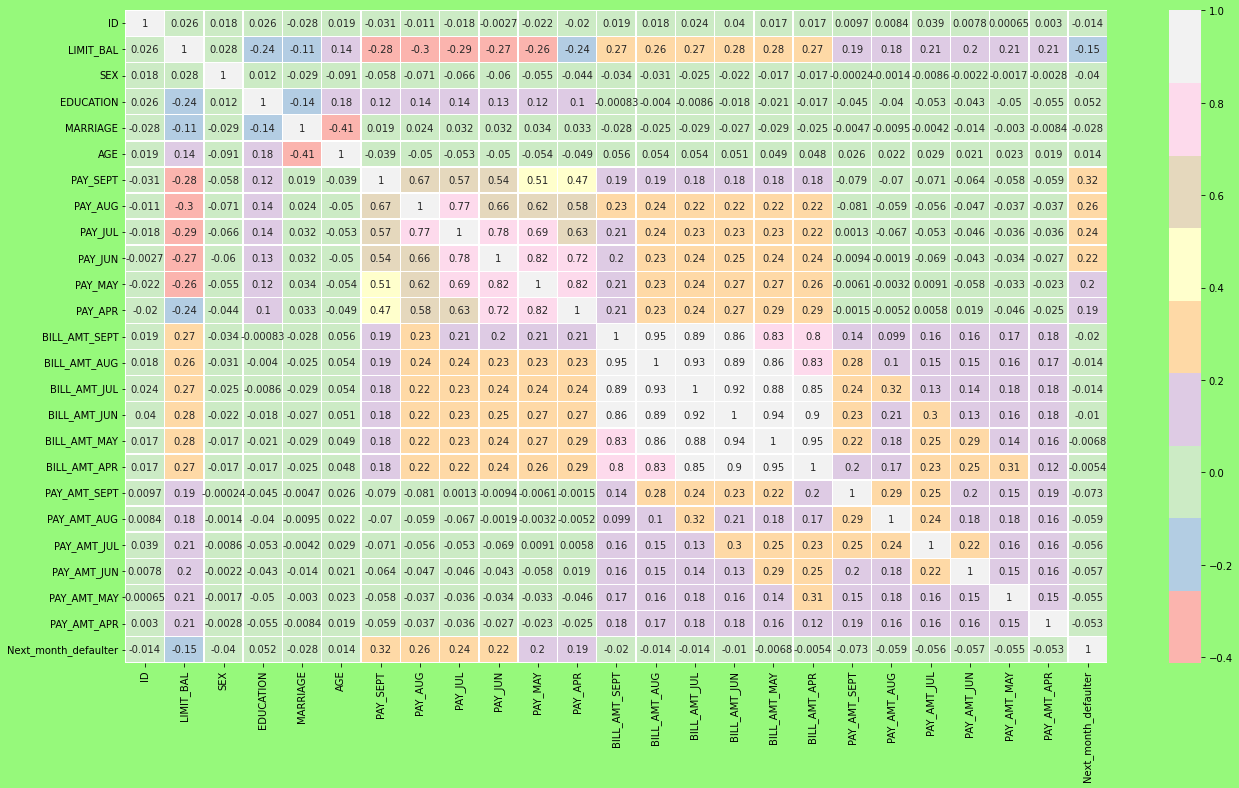

In [41]:
plt.figure (figsize= (22,12),edgecolor='k',facecolor='xkcd:light green')
correlation= df.corr()
sns.heatmap(correlation, annot=True, cmap='Pastel1',linewidths=.5)

### **It seems from the above graph that there are some negatively correlated feature like age and marriage.**

## **FEATURE ENGINEERING**
#### **ONE HOT ENCODING**
* **One hot encoding is a process by which categorical variables are converted into a numerical variables that could be provided to ML algorithms to do a better job in prediction.**
* **Here we perform one hot encoding on 'EDUCATION', 'MARRIAGE', and 'SEX'.**

In [42]:
#get dummies variable
df = pd.get_dummies(df,columns=['EDUCATION','SEX','MARRIAGE'])

In [43]:
# removing some columns that are unimportant.
df.drop(['ID','Defaulter','AGE'], axis=1,inplace =True)

In [44]:
df = df.dropna()

In [45]:
df=df.astype('int64')
df.shape

(29833, 29)

In [46]:
df.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Next_month_defaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0,1,1,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,1,0,1,0
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,1,0,1,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,0,1,1,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,1,0,1,0,0


### **Creating Independent and Dependent Variables:**

In [47]:
X = df.drop(['Next_month_defaulter'] , axis=1)
y = df['Next_month_defaulter']

X = X.apply(lambda x : (x-np.mean(x))/np.std(x))
X.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,-1.154838,1.792316,1.779811,-0.697360,-0.667088,-1.529521,-1.485913,-0.650323,-0.655496,-0.676010,-0.682713,-0.674268,-0.662249,-0.342148,-0.225626,-0.312030,-0.311761,-0.319517,-0.294257,-0.755197,1.06517,-0.443313,-0.06408,-0.809660,0.809660,1.094221,-1.066749,-0.113132
1,-0.358196,-0.876122,1.779811,0.137519,0.187336,0.233726,1.989732,-0.667504,-0.675375,-0.646506,-0.630314,-0.615611,-0.605833,-0.342148,-0.212062,-0.251011,-0.246223,-0.319517,-0.179347,-0.755197,1.06517,-0.443313,-0.06408,-0.809660,0.809660,-0.913892,0.937428,-0.113132
2,-0.597189,0.013357,0.110380,0.137519,0.187336,0.233726,0.251909,-0.296853,-0.497773,-0.485481,-0.453210,-0.420490,-0.393248,-0.249486,-0.190256,-0.251011,-0.246223,-0.251398,-0.006982,-0.755197,1.06517,-0.443313,-0.06408,-0.809660,0.809660,-0.913892,0.937428,-0.113132
3,-0.915845,0.013357,0.110380,0.137519,0.187336,0.233726,0.251909,-0.049106,-0.003947,0.043499,-0.229279,-0.182620,-0.151079,-0.220064,-0.167620,-0.238807,-0.239669,-0.246698,-0.236802,-0.755197,1.06517,-0.443313,-0.06408,-0.809660,0.809660,1.094221,-1.066749,-0.113132
4,-0.915845,-0.876122,0.110380,-0.697360,0.187336,0.233726,0.251909,-0.584670,-0.618422,-0.155705,-0.347370,-0.349219,-0.331278,-0.220064,1.344093,0.298161,0.278085,-0.272583,-0.255245,-0.755197,1.06517,-0.443313,-0.06408,1.235086,-1.235086,1.094221,-1.066749,-0.113132


In [48]:
y.head().reset_index()

,index,Next_month_defaulter
0,0,1
1,1,1
2,2,0
3,3,0
4,4,0


### **Spiliting Dataset into training and test set.**

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [50]:
# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(20883, 28) (20883,)
(8950, 28) (8950,)


### **Oversampling**

### **As we have imbalance dataset so we have to apply Random Over Sampling to balance it.**
* ### **Random oversampling :-** Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. 

In [51]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

# fit predictor and target variable
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_ros))

Original dataset shape Counter({0: 16259, 1: 4624})
Resample dataset shape Counter({0: 16259, 1: 16259})


## **Modelling:-** 

### **We will build Four models**
* **Logistic Regression**
* **Stochastic Gradient Descent**
* **Decision Tree Classifier**
* **Support Vector Machine**


## **Performance Metrics**
*  **Precision is a good metric to use when the costs of false positive(FP) is high.**

     *Precision = TP / (TP + FP)*

* **Recall is a good metric to use when the cost associated with false negative(FN) is high.**

    *Recall = TP / (TP + FN)*

* **F1-score is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.**

     *F1-score = 2 (precision recall) / (precision + recall)*

### **LOGISTIC REGRESSION**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100] }   #set the parmeter

logistic_model= GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
logistic_model.fit(X_train_ros, y_train_ros)            #fit the model 

Fitting 3 folds for each of 34 candidates, totalling 102 fits


GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

### **Cross Validation :** In cross validation we divide our data into 3 parts training, validation and testing. The testing data is only for the final check, train and validation is used for the hyper parameter tuning in order to avoid the data leakage. 

* ### **GridSearchCV is a library function that helps to loop through predefined hyperparameters and fit our estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.**

  *here my total parameter values is 17 and i give crossvalidation to 3 i.e cv =3...... which means our model will run 51 times [17*3=51]......this is called GridSearchCV*

In [53]:
logistic_model.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced')

In [54]:
logistic_model.best_params_   # best_params will give you the best value from all those combination

{'C': 0.01, 'penalty': 'l2'}

In [55]:
logistic_model.score(X_train_ros, y_train_ros)

0.6417983885847838

In [56]:
logistic_model.best_score_

0.6395841178378567

In [57]:
# Get the y- train & test predicted values
y_train_preds_logistic = logistic_model.predict(X_train_ros)
y_test_preds_logistic = logistic_model.predict(X_test)

In [58]:
# Importing packages
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [59]:
# accuracy score of train set and test set
logistic_train_accuracy= accuracy_score(y_train_ros, y_train_preds_logistic)
logistic_test_accuracy= accuracy_score(y_test, y_test_preds_logistic)

print("The accuracy on train data is ", logistic_train_accuracy)
print("The accuracy on test data is ", logistic_test_accuracy)

The accuracy on train data is  0.6710129774278861
The accuracy on test data is  0.691731843575419


In [60]:
##applying precission,recall,f1,roc_score and confusion matrix to our test and predicted data 
logistic_test_precision= precision_score(y_test, y_test_preds_logistic)
logistic_test_recall= recall_score(y_test, y_test_preds_logistic)
logistic_test_f1score= f1_score(y_test, y_test_preds_logistic)
logistic_test_roc_auc= roc_auc_score(y_test, y_test_preds_logistic)
logistic_test_confusion_matrix= confusion_matrix(y_test, y_test_preds_logistic)

#print the precission,recall,f1,roc_score and confusion amtrix
print("The precision on test data is:", logistic_test_precision)
print("The recall on test data is:", logistic_test_recall)
print("The f1 on test data is:", logistic_test_f1score)
print("The roc_auc_score on test data is:", logistic_test_roc_auc)
print("The confusion matrix on test data is: \n", logistic_test_confusion_matrix)

The precision on test data is: 0.3868871825162434
The recall on test data is: 0.6573005519317612
The f1 on test data is: 0.48707938278490426
The roc_auc_score on test data is: 0.6794480336200418
The confusion matrix on test data is: 
 [[4881 2076]
 [ 683 1310]]


[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

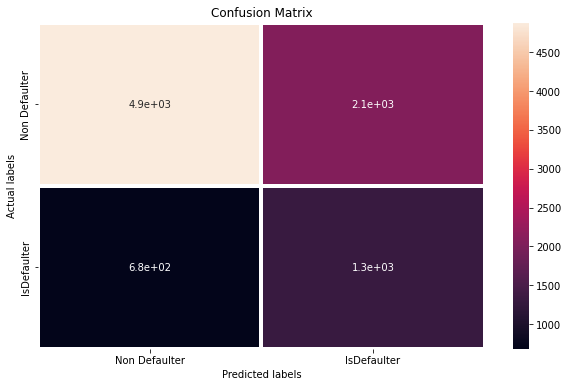

In [61]:
# Get the confusion matrix for logistic
labels = ['Non Defaulter', 'IsDefaulter']

plt.figure (figsize= (10,6))
ax= plt.subplot()
sns.heatmap(logistic_test_confusion_matrix, annot=True, ax = ax, lw = 3) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **STOCHASTIC GRADIENT DESCENT**

In [62]:
from sklearn.linear_model import SGDClassifier

sgd_params = {'alpha': [0.0001,0.00001, 0.001, 0.01,0.05,0.1,0.2,0.3,0.4,0.5, 1.0, 5.0]}

sgd_model = GridSearchCV(SGDClassifier(class_weight='balanced'), param_grid = sgd_params, scoring='recall', cv=3, n_jobs=-1)
sgd_model.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, estimator=SGDClassifier(class_weight='balanced'), n_jobs=-1,
             param_grid={'alpha': [0.0001, 1e-05, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 1.0, 5.0]},
             scoring='recall')

In [63]:
sgd_model.best_estimator_

SGDClassifier(alpha=1e-05, class_weight='balanced')

In [64]:
sgd_model.best_params_

{'alpha': 1e-05}

In [65]:
sgd_model.score(X_train_ros, y_train_ros)

0.6726120917645612

In [66]:
sgd_model.best_score_

0.6604950419314122

In [67]:
# Get the y- train & test predicted values
y_train_preds_sgd = sgd_model.predict(X_train_ros)
y_test_preds_sgd = sgd_model.predict(X_test)

In [68]:
# Get the accuracy scores
sgd_train_accuracy= accuracy_score(y_train_ros, y_train_preds_sgd)
sgd_test_accuracy= accuracy_score(y_test, y_test_preds_sgd)

print("The accuracy on train data is: ", sgd_train_accuracy)
print("The accuracy on test data is: ", sgd_test_accuracy)

The accuracy on train data is:  0.6228550341349407
The accuracy on test data is:  0.5884916201117318


In [69]:
sgd_test_precision= precision_score(y_test, y_test_preds_sgd)
sgd_test_recall= recall_score(y_test, y_test_preds_sgd)
sgd_test_f1score= f1_score(y_test, y_test_preds_sgd)
sgd_test_roc_auc= roc_auc_score(y_test, y_test_preds_sgd)
sgd_test_confusion_matrix= confusion_matrix(y_test, y_test_preds_sgd)

print("The precision on test data is:", sgd_test_precision)
print("The recall on test data is:", sgd_test_recall)
print("The f1 on test data is:", sgd_test_f1score)
print("The roc_auc_score on test data is:", sgd_test_roc_auc)
print("The confusion matrix on test data is: \n", sgd_test_confusion_matrix)

The precision on test data is: 0.3079545454545455
The recall on test data is: 0.6798795785248369
The f1 on test data is: 0.42390114187392464
The roc_auc_score on test data is: 0.6210954598100683
The confusion matrix on test data is: 
 [[3912 3045]
 [ 638 1355]]


[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

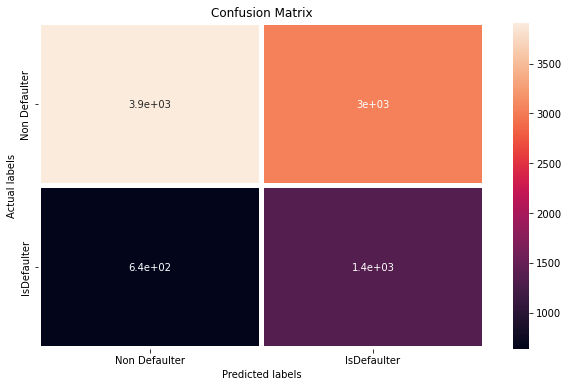

In [70]:
# Get the confusion matrix sgd
labels = ['Non Defaulter', 'IsDefaulter']

plt.figure (figsize= (10,6))
ax= plt.subplot()
sns.heatmap(sgd_test_confusion_matrix, annot=True, ax = ax, lw = 4)    #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **DECISION TREE CLASSIFIER**

In [71]:
from sklearn.tree import DecisionTreeClassifier

dtc_params = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[2,4,6,8,10], 
              'min_samples_split':[2,4,6,8,10],
              }

dtc_model = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid= dtc_params, scoring = 'recall', cv=3, n_jobs=-1)
dtc_model.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [72]:
dtc_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2)

In [73]:
dtc_model.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [74]:
dtc_model.score(X_train_ros, y_train_ros)

0.7360231256534843

In [75]:
dtc_model.best_score_

0.7097610748205655

In [76]:
# Get the y- train & test predicted values
y_train_preds_dtc = dtc_model.predict(X_train_ros)
y_test_preds_dtc = dtc_model.predict(X_test)

In [77]:
# get the accuracy
dtc_train_accuracy= accuracy_score(y_train_ros, y_train_preds_dtc)
dtc_test_accuracy= accuracy_score(y_test, y_test_preds_dtc)

print("The accuracy on train data is ", dtc_train_accuracy)
print("The accuracy on test data is ", dtc_test_accuracy)

The accuracy on train data is  0.7687127129589766
The accuracy on test data is  0.7335195530726257


In [78]:
dtc_test_precision= precision_score(y_test, y_test_preds_dtc)
dtc_test_recall= recall_score(y_test, y_test_preds_dtc)
dtc_test_f1score= f1_score(y_test, y_test_preds_dtc)
dtc_test_roc_auc= roc_auc_score(y_test, y_test_preds_dtc)
dtc_test_confusion_matrix= confusion_matrix(y_test, y_test_preds_dtc)

print("The precision on test data is:", dtc_test_precision)
print("The recall on test data is:", dtc_test_recall)
print("The f1 on test data is:", dtc_test_f1score)
print("The roc_auc_score on test data is:", dtc_test_roc_auc)
print("The confusion matrix on test data is: \n", dtc_test_confusion_matrix)

The precision on test data is: 0.4302491103202847
The recall on test data is: 0.6066231811339688
The f1 on test data is: 0.5034353529044348
The roc_auc_score on test data is: 0.6882476262145336
The confusion matrix on test data is: 
 [[5356 1601]
 [ 784 1209]]


[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

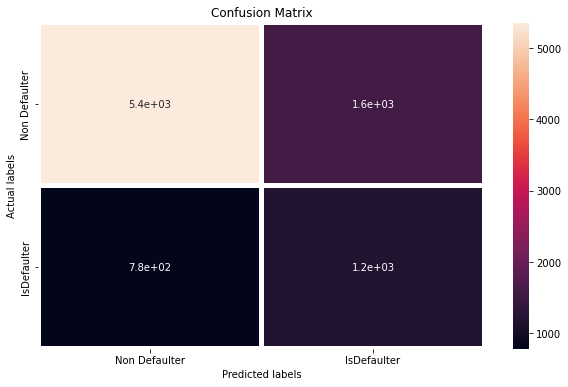

In [79]:
# Get the confusion matrix for dtc
labels = ['Non Defaulter', 'IsDefaulter']

plt.figure (figsize= (10,6))
ax= plt.subplot()
sns.heatmap(dtc_test_confusion_matrix, annot=True, ax = ax, lw = 4)    

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **SUPPORT VECTOR MACHINE**


In [80]:
from sklearn import svm
 
#Create a svm Classifier
svm_model = svm.SVC(kernel = 'poly', gamma='scale', probability=True) 
 
#Train the model using the training sets
svm_model.fit(X_train_ros, y_train_ros)

SVC(kernel='poly', probability=True)

In [81]:
svm_model.score(X_train_ros, y_train_ros)

0.731072021649548

In [82]:
# Get the y- train & test predicted values
y_train_preds_svm = svm_model.predict(X_train_ros)
y_test_preds_svm = svm_model.predict(X_test)

In [83]:
#get the accuracy score
svm_train_accuracy= accuracy_score(y_train_ros, y_train_preds_svm)
svm_test_accuracy= accuracy_score(y_test, y_test_preds_svm)

print("The accuracy on train data is ", svm_train_accuracy)
print("The accuracy on test data is ", svm_test_accuracy)

The accuracy on train data is  0.731072021649548
The accuracy on test data is  0.7735195530726257


In [84]:
svm_test_precision= precision_score(y_test, y_test_preds_svm)
svm_test_recall= recall_score(y_test, y_test_preds_svm)
svm_test_f1score= f1_score(y_test, y_test_preds_svm)
svm_test_roc_auc= roc_auc_score(y_test, y_test_preds_svm)
svm_test_confusion_matrix= confusion_matrix(y_test, y_test_preds_svm)

print("The precision on test data is:", svm_test_precision)
print("The recall on test data is:", svm_test_recall)
print("The f1 on test data is:", svm_test_f1score)
print("The roc_auc_score on test data is:", svm_test_roc_auc)
print("The confusion matrix on test data is: \n", svm_test_confusion_matrix)

The precision on test data is: 0.49253075571177507
The recall on test data is: 0.562468640240843
The f1 on test data is: 0.5251815413445772
The roc_auc_score on test data is: 0.6982244020522886
The confusion matrix on test data is: 
 [[5802 1155]
 [ 872 1121]]


[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

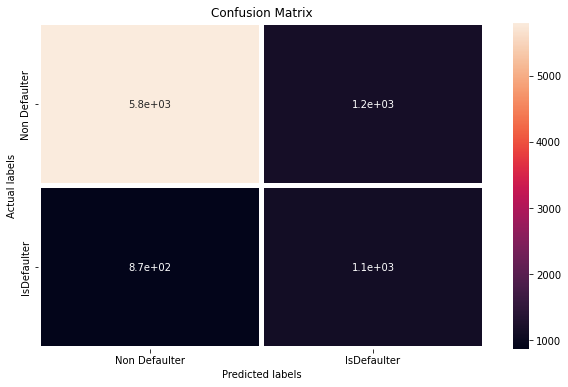

In [85]:
# Get the confusion matrix for svm 
labels = ['Non Defaulter', 'IsDefaulter']

plt.figure (figsize= (10,6))
ax= plt.subplot()
sns.heatmap(svm_test_confusion_matrix, annot=True, ax = ax, lw = 4)    

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **EVALUATION OF ALL MODELS**

In [86]:
# Matrix comparison
Models = ['Logistic Regression','Stochastic Gradient Descent','Decision Tree Classifier', 'Support Vector Machine']
train_accuracy = [logistic_train_accuracy, sgd_train_accuracy, dtc_train_accuracy, svm_train_accuracy]
test_accuracy = [logistic_test_accuracy, sgd_test_accuracy, dtc_test_accuracy, svm_test_accuracy]
precision_score = [logistic_test_precision, sgd_test_precision, dtc_test_precision, svm_test_precision]
recall_score = [logistic_test_recall, sgd_test_recall, dtc_test_recall, svm_test_recall]
f1_score = [logistic_test_f1score, sgd_test_f1score, dtc_test_f1score, svm_test_f1score]
roc_auc_score = [logistic_test_roc_auc, sgd_test_roc_auc, dtc_test_roc_auc, svm_test_roc_auc]

In [87]:
pd.DataFrame({'Models Classifier': Models, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score, 'ROC_AUC Score': roc_auc_score})

,Models Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score,ROC_AUC Score
0,Logistic Regression,0.671013,0.691732,0.386887,0.657301,0.487079,0.679448
1,Stochastic Gradient Descent,0.622855,0.588492,0.307955,0.679880,0.423901,0.621095
2,Decision Tree Classifier,0.768713,0.733520,0.430249,0.606623,0.503435,0.688248
3,Support Vector Machine,0.731072,0.773520,0.492531,0.562469,0.525182,0.698224


### **Plotting ROC AUC Curve :-**
### **ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

  * *True Positive Rate*

  * *False Positive Rate*

### **AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve**

In [91]:
calibrator = CalibratedClassifierCV(sgd_model, cv='prefit')
sgd_model=calibrator.fit(X_train_ros, y_train_ros) 

#predict probabilities
pred_prob1 = logistic_model.predict_proba(X_test)
pred_prob2 = sgd_model.predict_proba(X_test)
pred_prob3 = dtc_model.predict_proba(X_test)
pred_prob4 = svm_model.predict_proba(X_test)

#roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

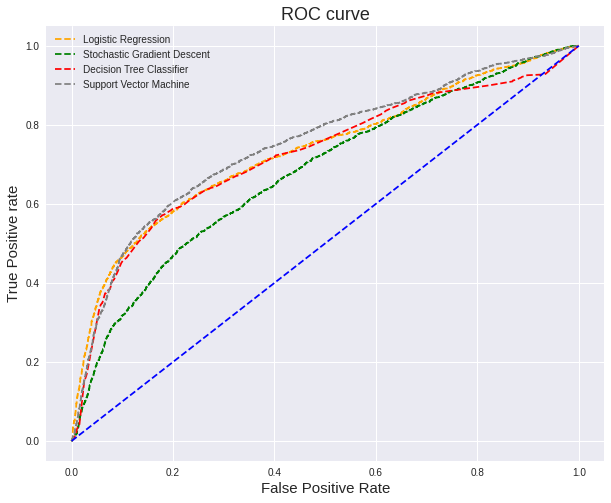

In [92]:
# matplotlib
import matplotlib.pyplot as plt
plt.figure (figsize= (10,8))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Stochastic Gradient Descent')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='grey', label='Support Vector Machine')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve',fontsize=18)
# x label
plt.xlabel('False Positive Rate',fontsize=15)
# y label
plt.ylabel('True Positive rate',fontsize=15)

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### conclusion:
1. When we load the data we check for duplicate and null values if there but luckly we see that there is no null values nor duplicate values, still we apply dropna for the betterment of our convinience.
2. Next we rename the column for each features for better understanding.
3. From above graph we check the distribution of defaulter vs non defaulter and we see around 78% are non defaulter and 22% are defaulter. Also we check for Marriage, Education, Sex with respect to defaulter and we found in marriage more number of defaulter is Female, in Education more no. of defaulter is university and in Marriage more no. of defaulter is single.
4. Using boxplot to detect the outliers and we see that there are so many outliers in the data so we apply IQR(Inter Quartile Range) which is one of the technique to remove outliers.
5. Correlation matrix gives the graphical representation between all the variables and with the help of correlation matrix we see that age and marriage are highly negatively correlated to each other.
6. After that we build the four models Logistic Regression, Stochastic gradient descent, Decision Tree and Support vector machine and inspite of all the models,the best accuracy is obtained from the Support Vector Machine.
  * Using a Logistic Regression classifier, we can predict with 69.17% accuracy, whether a customer is likely to default next month.
  * With Stochastic Gradient Descent classifier, 58.84% customer is likely to default next month.
  * With Decision Tree classifier, 73.35% customer is likely to default next month.
  * And with Support Vector Machine classifier, 77.35% customer is likely to default next month.   
7. From above table DeciSion Tree Classifier andSupport Vector Machine are giving us the best Precision, F1-score, and ROC Score among other algorithms. We can conclude that these two algorithms are the best to predict whether the credit card is default or not default according to our analysis.